Data Preparation


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import davies_bouldin_score

In [2]:
data = pd.read_csv('/content/sample_data/Sleep_health_and_lifestyle_dataset.csv')
print('Sample Data:')
data.head(31)

Sample Data:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [3]:
data.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [4]:
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [5]:
# Memisahkan fitur dan target
X = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
          'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']]
y = data['Sleep Disorder']


In [6]:
# Mengubah variabel kategorikal menjadi one-hot encoding
X_encoded = pd.get_dummies(X)
y_encoded = pd.get_dummies(y)
# Mengubah nilai kategorikal pada kolom 'BMI Category' menjadi representasi numerik
le = LabelEncoder()
if 'BMI Category' in X_encoded.columns:
    X_encoded['BMI Category'] = le.fit_transform(X_encoded['BMI Category'])
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Modelling & Training Data Model

In [7]:
# Membuat model Decision Tree
model = DecisionTreeClassifier()
# Melatih model dengan data latih
model.fit(X_train, y_train)


DecisionTreeClassifier()

Evaluation

In [8]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [9]:
# Evaluasi model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



In [10]:
# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.88


Visualisation


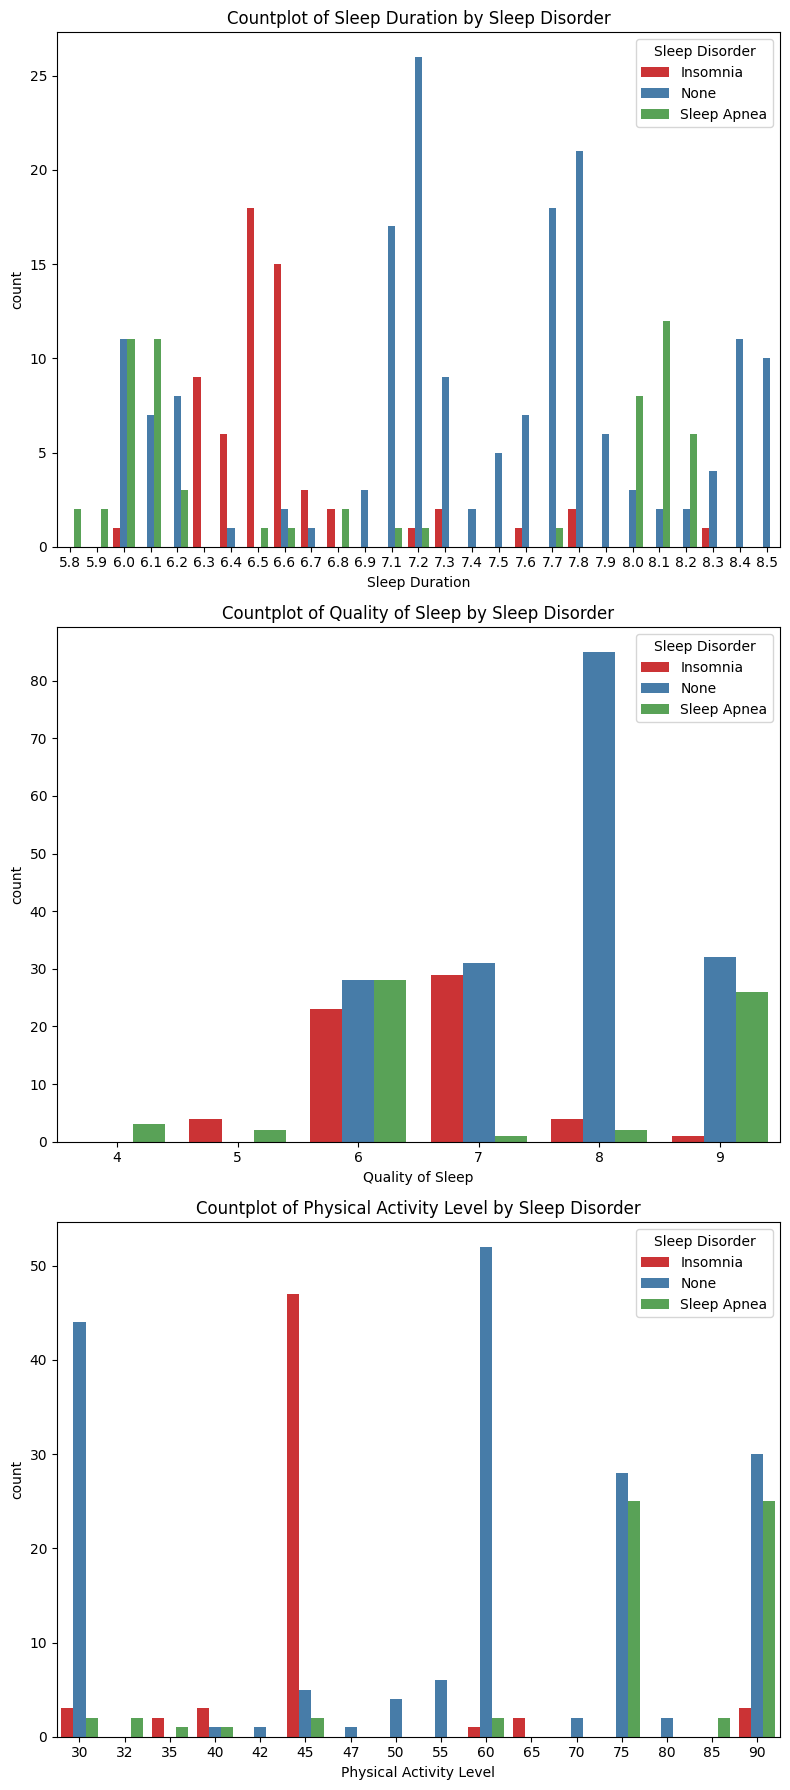

In [11]:
# Visualisasi histogram untuk setiap fitur
features = ['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level']
# Menggabungkan X_train dan y_train
X_train_with_target = X_train.copy()
X_train_with_target['Sleep Disorder'] = y_train

# Plot countplot
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6 * len(features)))
for i, feature in enumerate(features):
    ax = axes[i]
    sns.countplot(data=X_train_with_target, x=feature, hue='Sleep Disorder', ax=ax, palette='Set1')
    ax.set_title(f'Countplot of {feature} by Sleep Disorder')
plt.tight_layout()
plt.show()



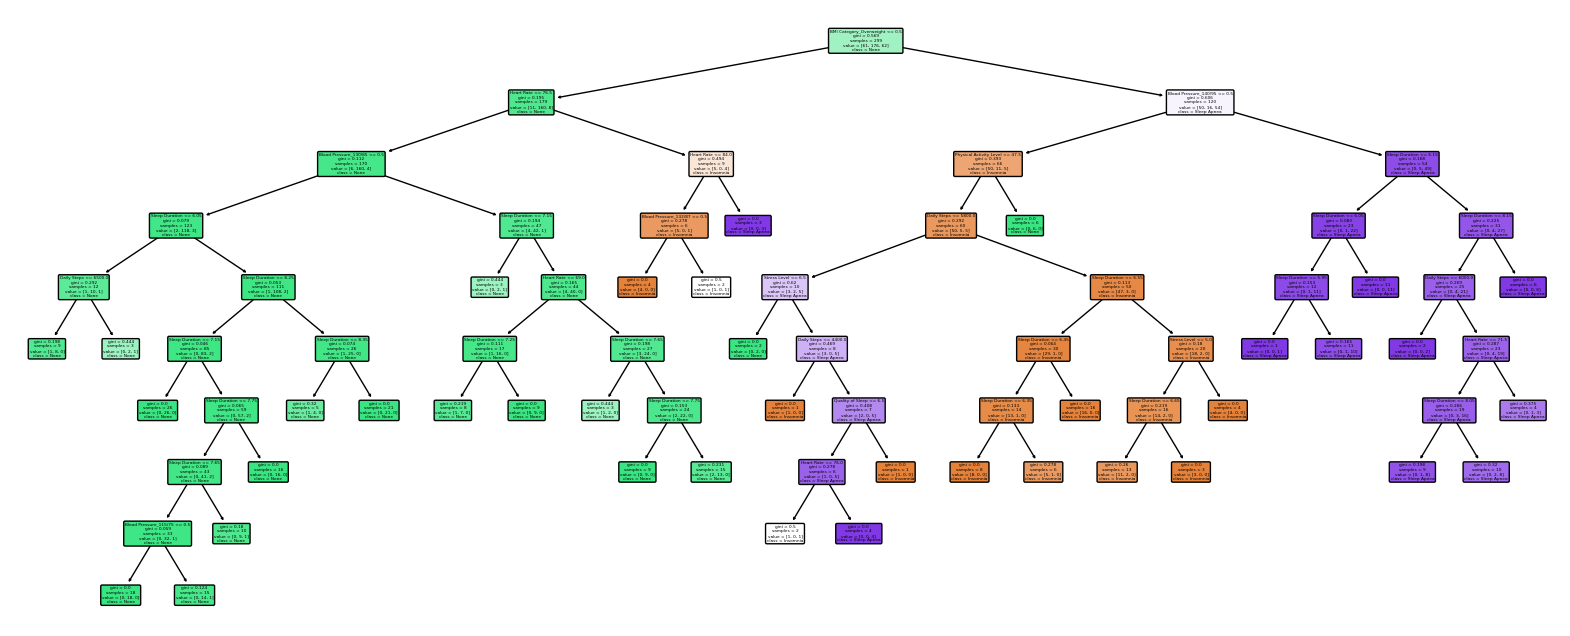

In [12]:
# Visualisasi Decision Tree
plt.figure(figsize=(20, 8))
plot_tree(model, feature_names=X_encoded.columns, class_names=y_encoded.columns, filled=True, rounded=True)
plt.show()